# sparse_lap execution time based on whs and image_size

Goal is to visualise how long specific parts of the `sparse_lap` function take based on image size and window half size.

In [30]:
using LAP_julia, TimerOutputs, DataFrames, TableView, JLD2, FileIO, PyPlot

In [31]:
# run once, to get rid of compilation slowdown
img, imgw, flow = gen_init()
for reg_fun in [sparse_lap, sparse_lap_win_sum1]
    whs = 12
    window = [25, 25]
    timer = TimerOutput("test")
    test_registration_alg(reg_fun, img, imgw, flow, [whs, window], Dict(:timer => timer), timer=timer, display=false)
end

## gather data

In [32]:
# prepare new dataframe
sp_lap_win_sum = DataFrame(
    index = Int[],
    reg_fun = Symbol[],
    img_size = Int[],
    whs = Int[],
    timer = TimerOutput[],
    results = Dict{String,Float64}[]
    #Benchmark = BenchmarkTools.Trial[],
    #flow = Matrix[],
    #flow_est = Matrix[]
    )

window_half_sizes = cat(collect(1:51), collect(61:10:101), collect(141:40:381), dims=1);
img_sizes = [50, 100, 200, 400, 800, 1600];

In [33]:
# params:
# call function 4 more times for small whs < 20
repeat_thresh = 20
repeat_count = 4

# fill dataframe
df = sp_lap_win_sum
let index = 0
    for img_size in img_sizes
        img, imgw, flow = gen_init(:chess, chess_args=[25, img_size/25])

        # limit the max window half size to 1/4 the image
        whs_limit = img_size/4
        whs_modified = map(x -> x <= whs_limit ? x : 0, window_half_sizes)

        for whs in whs_modified
            for reg_fun in [sparse_lap_win_sum1, sparse_lap]
                if whs != 0
                    window = [whs * 2 + 1, whs * 2 + 1]
                    timer = TimerOutput("reg alg: sp lap")
                    # run once:
                    flow_est, source_reg, timer, results = test_registration_alg(reg_fun, img, imgw, flow, [whs, window], Dict(:timer => timer), timer=timer, display=false)
                    # add runs
                    if whs <= repeat_thresh
                        for _ in 1:repeat_count
                            flow_est, source_reg, timer, results = test_registration_alg(reg_fun, img, imgw, flow, [whs, window], Dict(:timer => timer), timer=timer, display=false)
                        end
                    end
                else
                    timer = TimerOutput("blank")
                    results = Dict()
                end

                index = index + 1
                println("at index: ", index, " img_size:", img_size, " whs: ", whs)
                push!(df, Dict(:index => index,
                               :reg_fun => Symbol(reg_fun),
                               :img_size => img_size,
                               :whs => whs,
                               :timer => timer,
                               :results => results))
            end
        end
    end
end
                
@save "sp_lap_win_sum_df.jld2" df   

at index: 1 img_size:50 whs: 1
at index: 2 img_size:50 whs: 1
at index: 3 img_size:50 whs: 2
at index: 4 img_size:50 whs: 2
at index: 5 img_size:50 whs: 3
at index: 6 img_size:50 whs: 3
at index: 7 img_size:50 whs: 4
at index: 8 img_size:50 whs: 4
at index: 9 img_size:50 whs: 5
at index: 10 img_size:50 whs: 5
at index: 11 img_size:50 whs: 6
at index: 12 img_size:50 whs: 6
at index: 13 img_size:50 whs: 7
at index: 14 img_size:50 whs: 7
at index: 15 img_size:50 whs: 8
at index: 16 img_size:50 whs: 8
at index: 17 img_size:50 whs: 9
at index: 18 img_size:50 whs: 9
at index: 19 img_size:50 whs: 10
at index: 20 img_size:50 whs: 10
at index: 21 img_size:50 whs: 11
at index: 22 img_size:50 whs: 11
at index: 23 img_size:50 whs: 12
at index: 24 img_size:50 whs: 12
at index: 25 img_size:50 whs: 0
at index: 26 img_size:50 whs: 0
at index: 27 img_size:50 whs: 0
at index: 28 img_size:50 whs: 0
at index: 29 img_size:50 whs: 0
at index: 30 img_size:50 whs: 0
at index: 31 img_size:50 whs: 0
at index: 3

at index: 254 img_size:200 whs: 1
at index: 255 img_size:200 whs: 2
at index: 256 img_size:200 whs: 2
at index: 257 img_size:200 whs: 3
at index: 258 img_size:200 whs: 3
at index: 259 img_size:200 whs: 4
at index: 260 img_size:200 whs: 4
at index: 261 img_size:200 whs: 5
at index: 262 img_size:200 whs: 5
at index: 263 img_size:200 whs: 6
at index: 264 img_size:200 whs: 6
at index: 265 img_size:200 whs: 7
at index: 266 img_size:200 whs: 7
at index: 267 img_size:200 whs: 8
at index: 268 img_size:200 whs: 8
at index: 269 img_size:200 whs: 9
at index: 270 img_size:200 whs: 9
at index: 271 img_size:200 whs: 10
at index: 272 img_size:200 whs: 10
at index: 273 img_size:200 whs: 11
at index: 274 img_size:200 whs: 11
at index: 275 img_size:200 whs: 12
at index: 276 img_size:200 whs: 12
at index: 277 img_size:200 whs: 13
at index: 278 img_size:200 whs: 13
at index: 279 img_size:200 whs: 14
at index: 280 img_size:200 whs: 14
at index: 281 img_size:200 whs: 15
at index: 282 img_size:200 whs: 15
at

at index: 505 img_size:800 whs: 1
at index: 506 img_size:800 whs: 1
at index: 507 img_size:800 whs: 2
at index: 508 img_size:800 whs: 2
at index: 509 img_size:800 whs: 3
at index: 510 img_size:800 whs: 3
at index: 511 img_size:800 whs: 4
at index: 512 img_size:800 whs: 4
at index: 513 img_size:800 whs: 5
at index: 514 img_size:800 whs: 5
at index: 515 img_size:800 whs: 6
at index: 516 img_size:800 whs: 6
at index: 517 img_size:800 whs: 7
at index: 518 img_size:800 whs: 7
at index: 519 img_size:800 whs: 8
at index: 520 img_size:800 whs: 8
at index: 521 img_size:800 whs: 9
at index: 522 img_size:800 whs: 9
at index: 523 img_size:800 whs: 10
at index: 524 img_size:800 whs: 10
at index: 525 img_size:800 whs: 11
at index: 526 img_size:800 whs: 11
at index: 527 img_size:800 whs: 12
at index: 528 img_size:800 whs: 12
at index: 529 img_size:800 whs: 13
at index: 530 img_size:800 whs: 13
at index: 531 img_size:800 whs: 14
at index: 532 img_size:800 whs: 14
at index: 533 img_size:800 whs: 15
at 

at index: 738 img_size:1600 whs: 81
at index: 739 img_size:1600 whs: 91
at index: 740 img_size:1600 whs: 91
at index: 741 img_size:1600 whs: 101
at index: 742 img_size:1600 whs: 101
at index: 743 img_size:1600 whs: 141
at index: 744 img_size:1600 whs: 141
at index: 745 img_size:1600 whs: 181
at index: 746 img_size:1600 whs: 181
at index: 747 img_size:1600 whs: 221
at index: 748 img_size:1600 whs: 221
at index: 749 img_size:1600 whs: 261
at index: 750 img_size:1600 whs: 261
at index: 751 img_size:1600 whs: 301
at index: 752 img_size:1600 whs: 301
at index: 753 img_size:1600 whs: 341
at index: 754 img_size:1600 whs: 341
at index: 755 img_size:1600 whs: 381
at index: 756 img_size:1600 whs: 381


## Visualise results

Choose a specific `sections` directory of the timer variable to see how long it takes compute.

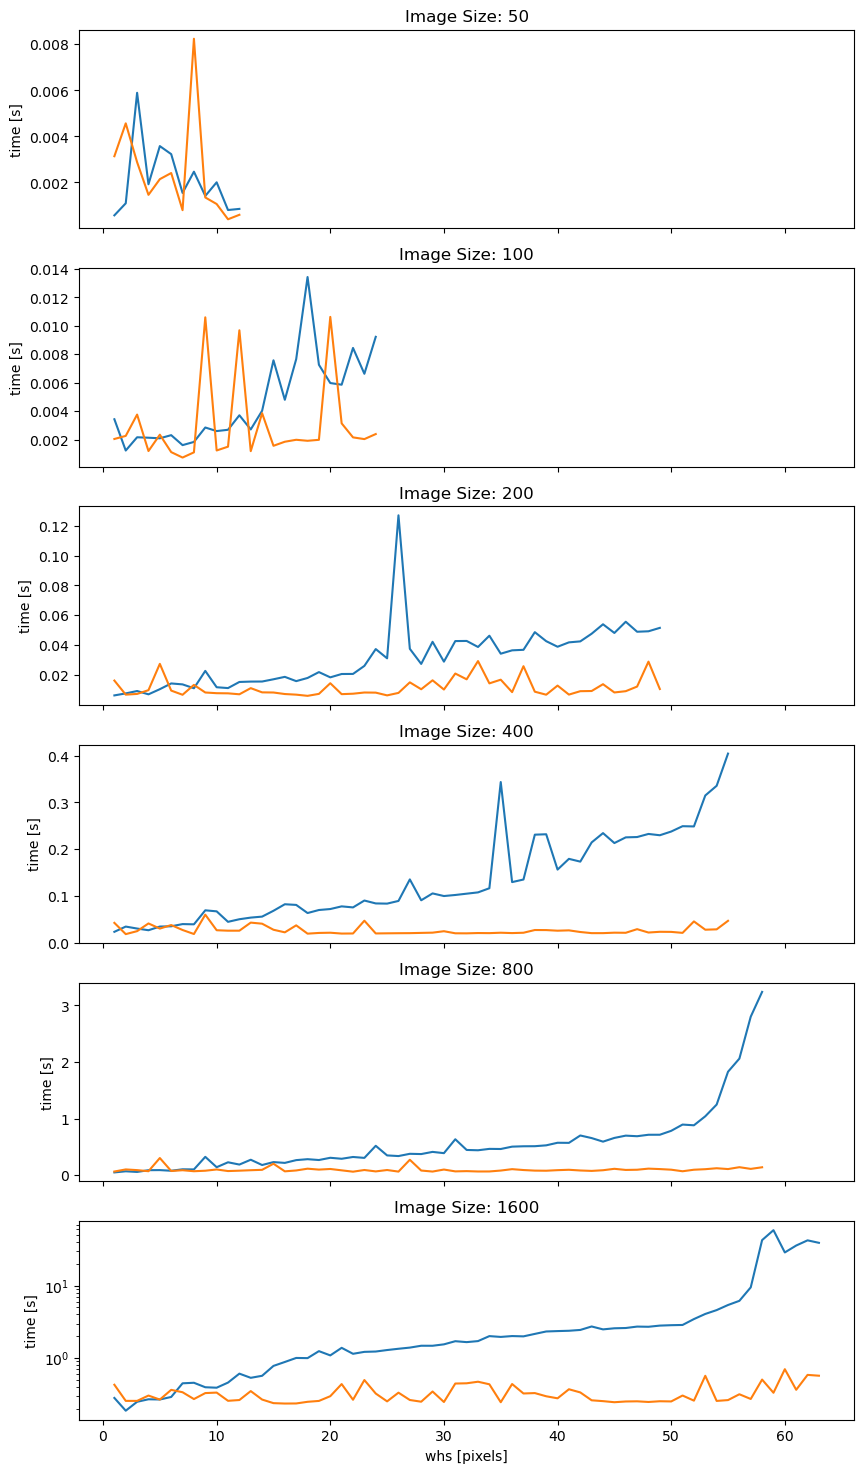

In [39]:
sections = ["reg alg: sp lap", "sparse lap", "prepare A and b"]
fig, axs = subplots(6, sharex=true, figsize=(10,10))
for (img_size, ax) in zip(img_sizes, axs)
    ax.set_title("Image Size: " * string(img_size))

    n = count(k -> k < (img_size/4), window_half_sizes)
    timers1 = df[(df.reg_fun .== :sparse_lap_win_sum1) .& (df.img_size .== img_size), :][:, :timer][1:n]
    timers3 = df[(df.reg_fun .== :sparse_lap) .& (df.img_size .== img_size), :][:, :timer][1:n]

    y1 = map(x -> get_avg_time(get_timer(x, sections)), timers1)
    y3 = map(x -> get_avg_time(get_timer(x, sections)), timers3)
    x = collect(1:n)

    yscale("log")
    subplots_adjust(top=1.5)
    ax.plot(x, y1)
    ax.plot(x, y3)
    xlabel("whs [pixels]")
    ax.set_ylabel("time [s]")
end

## helper functions

In [37]:
# get the timer[sections[1]][sections[2]]... and print errors, if errored return blank timer.
function get_timer(timer, sections)
    private_sections = copy(sections)
    try
        timer[private_sections[1]]
    catch e
        println(e)
        return TimerOutput()
    end
    out = timer
    while private_sections != []
        out = out[popfirst!(private_sections)]
    end
    return out
end

# get the avg time in seconds for the section in timer
function get_avg_time(timer)
    return (TimerOutputs.time(timer)/TimerOutputs.ncalls(timer))/10e8
end


get_avg_time (generic function with 1 method)